In [183]:
import psycopg2
import pandas as pd
from toolbox import DatabaseInterface
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


databaseInterface = DatabaseInterface()
def load_data(query):
    return(databaseInterface.select(query))

In [184]:
query_city = """
    SELECT article_date, city
    FROM articles
    JOIN contents ON articles.id = contents.article_id
    JOIN content_cities ON contents.id = content_cities.content_id
    ORDER BY article_date
    ;
    """
df_city = load_data(query_city)

In [185]:
df_city["city"] = df_city["city"].str.capitalize()

In [186]:
df_city["city"].unique()

array(['Odessa', 'Lviv', 'Kherson', 'Kharkiv', 'Donetsk', 'Simferopol',
       'Sloviansk', 'Horlivka', 'Kyiv', 'Yalta', 'Ternopil', 'Melitopol',
       'Brovary', 'Buchach', 'Irpin', 'Chernihiv', 'Poltava', 'Mariupol',
       'Borodyanka', 'Korosten', 'Drohobych', 'Okhtyrka', 'Pokrov',
       'Bucha', 'Kreminna', 'Fontanka', 'Rivne', 'Lyman', 'Fastiv',
       'Pavlohrad', 'Saky', 'Kakhovka', 'Berehove', 'Borova', 'Smila',
       'Cherkasy', 'Tokmak', 'Luka'], dtype=object)

In [187]:
df_city = df_city[
    (df_city['article_date'] >= "2022-01-01")
    & (df_city['article_date'] <= "2023-01-01")]

In [188]:
def countplot(df: pd.DataFrame, feature: str):
    chart = sns.countplot(df, x=feature, order=df[feature].value_counts().index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
    sns.set(rc={'figure.figsize':(10,5)});

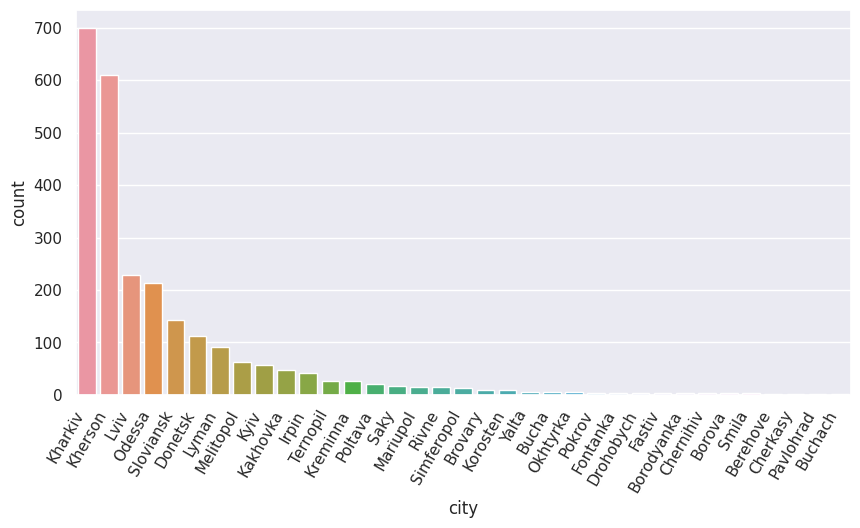

In [189]:
countplot(df_city, "city")

In [190]:
df_city

,article_date,city
52,2022-01-20 10:21:00,Yalta
53,2022-01-24 05:29:00,Kharkiv
54,2022-01-31 08:38:00,Kharkiv
55,2022-02-14 04:02:00,Lviv
56,2022-02-18 10:42:00,Donetsk
...,...,...
2555,2022-12-31 15:05:00,Kherson
2556,2022-12-31 17:37:00,Kharkiv
2557,2022-12-31 17:37:00,Kyiv
2558,2022-12-31 21:58:00,Kyiv


In [191]:
df_geocity = df_city.groupby(["city"]).count().sort_values("article_date", ascending=False).reset_index()
df_geocity = df_geocity.rename(columns={"article_date": "count"})

In [192]:
from geopy.geocoders import Nominatim

def latitude(city: str):
    # Initialize Nominatim API
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(city)
    try:
        lat = location.latitude
        return lat
    except:
        print(city)
    

def longitude(city: str):
    # Initialize Nominatim API
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(city)
    try:
        lon = location.longitude
        return lon
    except:
        print(city)

In [195]:
df_geocity["latitude"] = df_geocity["city"].apply(latitude)
df_geocity["longitude"] = df_geocity["city"].apply(longitude)

Borodyanka
Borodyanka


In [236]:
df_geocity.dropna()

,city,count,latitude,longitude
0,Kharkiv,699,49.992318,36.231015
1,Kherson,609,46.542172,33.407933
2,Lviv,228,49.841952,24.031592
3,Odessa,214,46.484302,30.732288
4,Sloviansk,143,48.852269,37.605824
5,Donetsk,113,48.015875,37.801341
6,Lyman,92,43.917639,-99.858164
7,Melitopol,63,46.846727,35.382728
8,Kyiv,57,50.450034,30.524136
9,Kakhovka,47,46.805463,33.481783


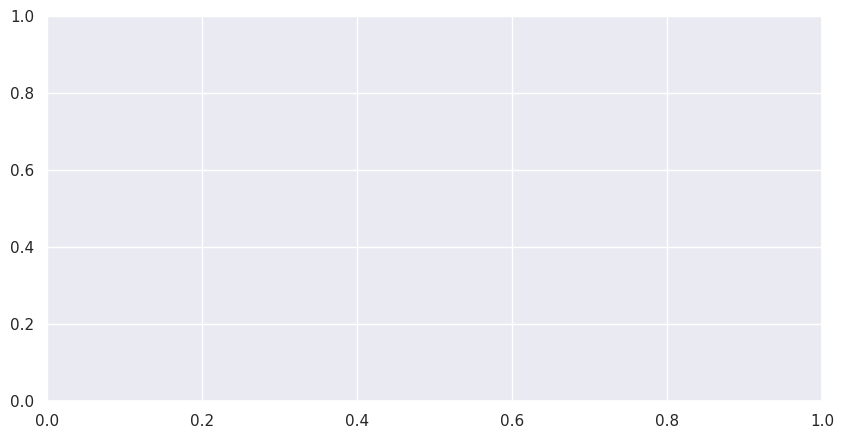

In [240]:
import plotly.express as px

# Data with latitude/longitude and values
fig, ax = plt.subplots()

fig = px.scatter_mapbox(
    df_geocity,
    lat="latitude",
    lon="longitude",
    size="count",
    color="count",
    hover_name="city",
    zoom=3,
    mapbox_style="open-street-map",
    height=700
)

fig.show()